In [113]:
import pandas as pd
import numpy as np
import os
os.chdir('c://users/Administrator//desktop//Flight_Ticket_Participant_Datasets//')

from matplotlib import pyplot as plt
import datetime
import warnings

warnings.filterwarnings('ignore')

In [114]:
f = pd.read_excel('Data_Train.xlsx')                #f1 = pd.read_excel('Data_Train.xlsx')
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
f.shape

(10683, 11)

In [4]:
f.isna().sum(axis =0)              ## 2 NA's

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
f[f['Total_Stops'].isna()]                      ## FINDING THE RECORDS WITH NA

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [115]:
f.dropna(axis=0,inplace = True)                  ### DROPPING NA RECORD
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


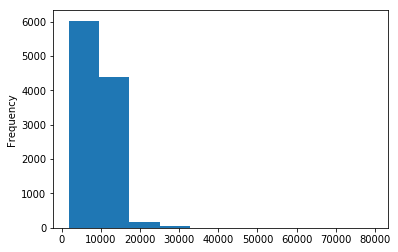

In [166]:
f.Price.plot(kind ='Hist')             ## A LOT OF OUTLIERS

In [179]:
## NORMALITY TEST 1

#The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness,
#s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

from scipy import stats                    ## USES SKEWNESS AND KURTOSIS TO CREATE A OMNIBUS TEST
                    
k2, p = stats.normaltest(f.Price)

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
k2

p = 0
The null hypothesis can be rejected


4981.6898969549

In [14]:
## NORMALITY TEST 2
#The Shapiro-Wilk test evaluates a data sample and quantifies 
 #how likely it is that the data was drawn from a Gaussian distribution

from scipy.stats import shapiro

stat, p = shapiro(f.Price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.896, p=0.000
Sample does not look Gaussian (reject H0)


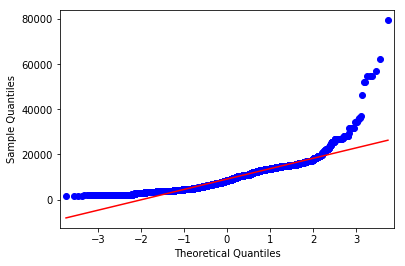

In [15]:
## NORMALITY TEST ( USING A GRAPH)

# QQ Plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(f.Price, line='s')
plt.show()

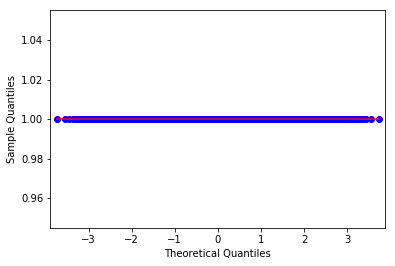

In [16]:
## JUST CHECKING NOT REPLACING

from sklearn.preprocessing import Normalizer

n =Normalizer()

p2 = n.fit_transform(f['Price'].reshape(-1,1))

qqplot(p2,line ='s')

plt.show()                 

# CLEANING TIME COLUMNS

In [116]:
f['Date_of_Journey'] = pd.to_datetime(f['Date_of_Journey'])

In [117]:
f['Weekday'] = f['Date_of_Journey'].dt.weekday

In [118]:
f['Date_of_Journey'] = (f['Date_of_Journey']).dt.date

In [56]:
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5


In [119]:
def cleantime(x):
    return int(x.replace(':',''))

In [120]:
f['Dep_Time'] = f.Dep_Time.apply(cleantime)              ## Time in INTEGER

In [59]:
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2220,01:10 22 Mar,2h 50m,non-stop,No info,3897,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,13:15,7h 25m,2 stops,No info,7662,5


1094


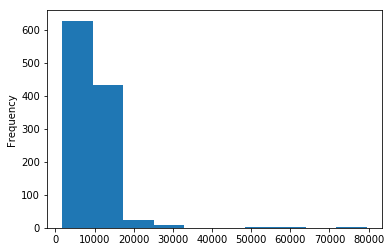

In [121]:
print(f[(f['Dep_Time']>= 0) & (f['Dep_Time'] < 600)]['Price'].count())
f[(f['Dep_Time']>= 0) & (f['Dep_Time'] < 600)]['Price'].plot(kind = 'Hist')

4282


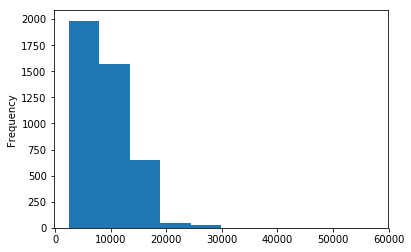

In [122]:
print(f[(f['Dep_Time']>= 600) & (f['Dep_Time'] < 1200)]['Price'].count())
f[(f['Dep_Time']>= 600) & (f['Dep_Time'] < 1200)]['Price'].plot(kind = 'Hist')

2604


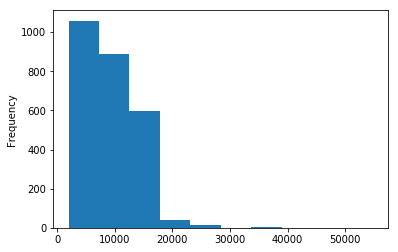

In [123]:
print(f[(f['Dep_Time']>= 1200) & (f['Dep_Time'] < 1800)]['Price'].count())
f[(f['Dep_Time']>= 1200) & (f['Dep_Time'] < 1800)]['Price'].plot(kind = 'Hist')

2702


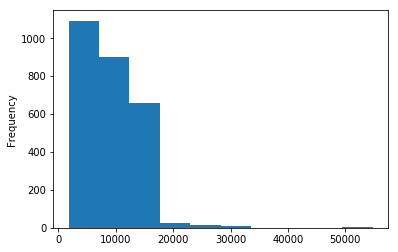

In [124]:
print(f[(f['Dep_Time']>= 1800) & (f['Dep_Time'] < 2359)]['Price'].count())
f[(f['Dep_Time']>= 1800) & (f['Dep_Time'] < 2359)]['Price'].plot(kind = 'Hist')

In [125]:
def trafficontime(x):
    if x>= 0 and x< 600:
        return 'low traffic'
    elif x>= 600 and x<1200:
        return 'high traffic'
    elif x>= 1200 and x<1800:
        return 'med traffic'
    elif x>= 1800 and x<= 2359:
        return 'med traffic'

In [126]:
def timeofday(x):
    if x > 2200 and x<500:
        return 'night'
    else:
        return 'day'

In [127]:
import re
def extractmin(x):
    try:
        x = x.split(' ')
    except:
        pass
    try:
        return int(re.sub('[^0-9]','',x[0]))*60+int(re.sub('[^0-9]','',x[1]))
    except:
        return int(re.sub('[^0-9]','',x[0]))*60

In [128]:
f['traffic'] = f.Dep_Time.apply(trafficontime) 

In [129]:
f['timeofday'] = f.Dep_Time.apply(timeofday)              ## catergorising the time

In [130]:
f['Duration'] = f.Duration.apply(extractmin)             ## MINUTES OF TRAVEL EXTRACTED

In [131]:
f.drop(['Arrival_Time','Route','Dep_Time'],axis = 1,inplace =True)    ## DROPPING UNWANTED COLS

In [132]:
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekday,traffic,timeofday
0,IndiGo,2019-03-24,Banglore,New Delhi,170,non-stop,No info,3897,6,med traffic,day
1,Air India,2019-01-05,Kolkata,Banglore,445,2 stops,No info,7662,5,low traffic,day


In [ ]:
## CHECK IF DATES AFFECT THE PRICES

In [75]:
f1 = f.sort_values('Date_of_Journey',ascending=False)         
f1.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekday,timeofday,traffic
3241,Jet Airways,2019-12-06,Kolkata,Banglore,435,1 stop,No info,8355,4,day,high traffic
7242,Jet Airways,2019-12-06,Kolkata,Banglore,400,1 stop,In-flight meal not included,9899,4,day,high traffic


In [ ]:
## WE CAN SEE NO TREND IN PRICES WITH RESPECT TO TIME OVER THE YEARS

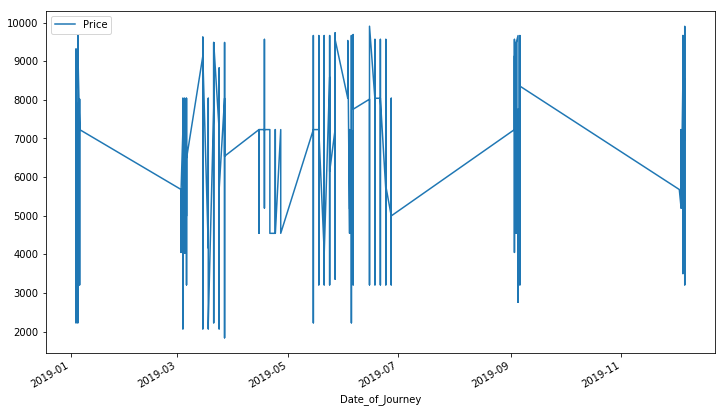

In [321]:
import matplotlib.pyplot as plt

f1[(f1['Price']<10000) & (f1['Airline'] == 'Jet Airways')][['Date_of_Journey','Price']].set_index('Date_of_Journey').plot(figsize = (12,7))

In [ ]:
## NO TREND IN ONE YEAR OF DATA ALSO

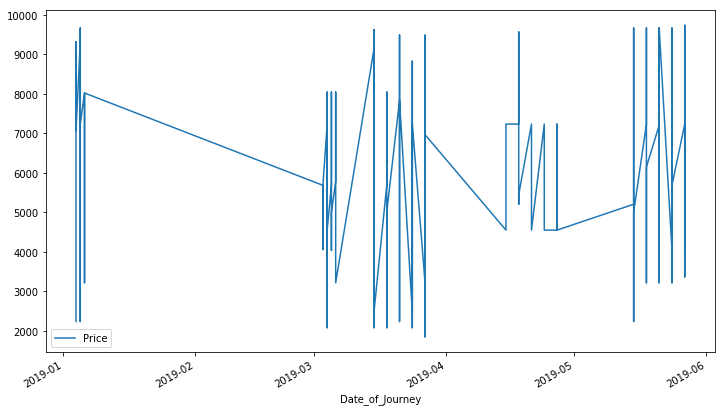

In [320]:
f1[(f1['Price']<10000) & (f1['Airline'] == 'Jet Airways') & (f1['Date_of_Journey'] > datetime.date(2019,1,1)) &  (f1['Date_of_Journey'] < datetime.date(2019,6,1))][['Date_of_Journey','Price']].set_index('Date_of_Journey').plot(figsize = (12,7))

In [140]:
f1['Date_of_Journey'][0].year

2019

In [163]:
import datetime as dt
f['Date_of_Journey'].map(dt.datetime.toordinal).head()        ## CAN DO THIS ALSO WHEN CORRELATION FOUND (1-1-1 would be 1)

0    737142
1    737064
2    737308
3    737398
4    737062
Name: Date_of_Journey, dtype: int64

In [ ]:
# DATES HAVE NO EFFECT (NOT LINEAR ATLEAST)#JUST DROPPING THE COLUMN

In [133]:
f.drop(['Date_of_Journey'],axis =1,inplace = True)

# CLEANING OTHER COLUMNS

In [134]:
def cleanstops(x):
    try:
        return int(re.sub('[^0-9]','',x))
    except:
        return 0    

In [136]:
f['Total_Stops'] = f.Total_Stops.apply(cleanstops)            ## GETTING THE NUMBER OF STOPS

In [137]:
f['Additional_Info'].value_counts()                            

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [138]:
def cleanai(x):
    if x in ['No info','No Info']:
        return 'no info'
    elif x == 'No check-in baggage included':
        return 'ncl'
    elif x == 'In-flight meal not included':
        return 'nfm'
    elif x == 'Business class':
        return 'bc'
    else:
        return 'other'

In [139]:
f['Additional_Info'] = f['Additional_Info'].apply(cleanai)           ## CLEANING AND CATEGEORISING THIS COL

In [140]:
f.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekday,traffic,timeofday
0,IndiGo,Banglore,New Delhi,170,0,no info,3897,6,med traffic,day
1,Air India,Kolkata,Banglore,445,0,no info,7662,5,low traffic,day


# SPLITTING THE DATA FOR TRAIN AND TEST

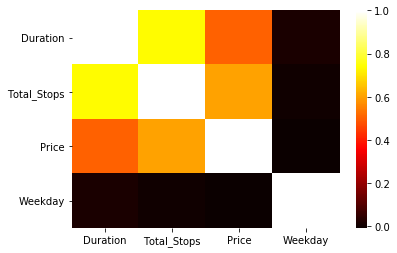

In [274]:
import seaborn as sb

sb.heatmap(f.corr(),cmap ='hot')

In [141]:
f.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekday,traffic,timeofday
0,IndiGo,Banglore,New Delhi,170,0,no info,3897,6,med traffic,day
1,Air India,Kolkata,Banglore,445,0,no info,7662,5,low traffic,day


In [198]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,categorical_features = [0,1,2])

#x1 = ohe.fit_transform(x)                  ## DOUBT!!!!!!!

In [226]:
x = f.drop(['Price','traffic','timeofday'],axis =1)
y = f['Price']
x1 = pd.get_dummies(x)
x1.shape

(10682, 31)

In [227]:
from sklearn.model_selection import train_test_split as tts

x_tr,x_ts,y_tr,y_ts = tts(x1,y,test_size = 0.2,random_state = 3)

# MODEL BUILDING

In [228]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [229]:
y_tsp = lr.predict(x_ts)

In [230]:
from sklearn.metrics import r2_score as rsqd,mean_squared_error as mse

np.sqrt(mse(y_ts,y_tsp))

2773.2046457345364

In [231]:
rsqd(y_ts,y_tsp)

0.6100234752081914

In [ ]:
##  (FEATURE SELECTION)

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kb = SelectKBest(score_func=chi2)
kb.fit(x1, y)

x11 =kb.transform(x1)

SelectKBest(k=10, score_func=<function chi2 at 0x000001E4FA099378>)

In [189]:
from sklearn.model_selection import train_test_split as tts

x_tr,x_ts,y_tr,y_ts = tts(x11,y,test_size = 0.2,random_state = 3)

In [190]:
lr2 = LinearRegression()

lr2.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
y_tsp = lr2.predict(x_ts)

np.sqrt(mse(y_ts,y_tsp))

3635.807018500895

In [ ]:
## ELASTIC REGRESSION

In [151]:
from sklearn.linear_model import ElasticNet

en =ElasticNet(alpha= 0.00005)

en.fit(x_tr,y_tr)

ElasticNet(alpha=5e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
y_tsp = en.predict(x_ts)

In [153]:
from sklearn.metrics import r2_score as rsqd,mean_squared_error as mse

np.sqrt(mse(y_ts,y_tsp))

2773.895604262578

In [154]:
rsqd(y_ts,y_tsp)

0.6098291215932532

In [107]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [108]:
dtr.fit(x_tr,y_tr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [109]:
rsqd(y_ts,dtr.predict(x_ts))

0.6464161316461503

In [110]:
np.sqrt(mse(y_ts,dtr.predict(x_ts)))

2640.638239564821

In [343]:
from sklearn.svm import SVR      ## SUPPORT MACHINE REGRESSOR

In [348]:
svr = SVR(kernel='linear',degree=1)

In [349]:
svr.fit(x_tr,y_tr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [350]:
rsqd(y_ts,svr.predict(x_ts))

0.41305747470572496